In [2]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import rdkit.Chem.AllChem as Chem
from rdkit.Chem import TorsionFingerprints
from rdkit.Chem import rdMolTransforms

import seaborn as sns
sns.set_theme(style="darkgrid")

from idp_rl.environments.environment_components.forcefield_mixins import CharMMMixin, MMFFMixin
import idp_rl.molecule_generation.generate_chignolin

In [1]:
num_confs = 200

chignolin = idp_rl.molecule_generation.generate_chignolin.generate_chignolin("GYDPETGTWG")
chignolin.RemoveAllConformers()
Chem.EmbedMultipleConfs(chignolin, numConfs=num_confs)
Chem.MMFFSanitizeMolecule(chignolin)

/home/yppatel/anaconda3/envs/idp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[20:01:12] Molecule does not have explicit Hs. Consider calling AddHs()


0

In [3]:
def get_gly7_dihedrals(version_mol):
    nonring, ring = TorsionFingerprints.CalculateTorsionLists(version_mol)
    torsions = [nr[0] for nr in nonring]

    full_dihedrals = []
    for conf_id in range(version_mol.GetNumConformers()):
        conf = version_mol.GetConformer(conf_id)
        phi = rdMolTransforms.GetDihedralDeg(conf, *torsions[24][0])
        psi = rdMolTransforms.GetDihedralDeg(conf, *torsions[25][0])
        full_dihedrals.append([phi, psi])
    full_dihedrals = np.array(full_dihedrals)

    return full_dihedrals

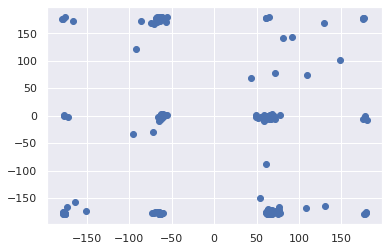

In [4]:
full_dihedrals_nonopt = get_gly7_dihedrals(chignolin)
plt.scatter(full_dihedrals_nonopt[:,0], full_dihedrals_nonopt[:,1])

In [5]:
Chem.MMFFOptimizeMoleculeConfs(chignolin, maxIters=1000)

[20:09:02] Molecule does not have explicit Hs. Consider calling AddHs()


[(0, 113.87947538186619),
 (0, 147.48801189959556),
 (0, 151.02123731914912),
 (1, 142.88172666520427),
 (1, 134.66009205838643),
 (0, 166.81248755930488),
 (0, 138.87874983679794),
 (1, 125.83429289336803),
 (1, 107.64972176987422),
 (0, 131.02777761293657),
 (1, 128.2927307671311),
 (1, 170.88626633341826),
 (1, 123.16332073466319),
 (0, 159.4144038717955),
 (1, 130.393072078601),
 (0, 134.50924659653796),
 (1, 156.20973562213365),
 (0, 153.31083600900487),
 (1, 124.69760008300803),
 (0, 147.34437358007222),
 (0, 145.95941981529214),
 (0, 129.43061674480805),
 (0, 152.82075594886564),
 (1, 147.129040030792),
 (1, 135.38528842317206),
 (0, 157.5174770546051),
 (0, 151.73312614628847),
 (0, 153.01480687532788),
 (0, 141.58906025905958),
 (0, 155.92930055595434),
 (0, 170.68508763798366),
 (1, 146.57137259302695),
 (0, 141.807414301893),
 (1, 145.0465492302218),
 (1, 152.4519684336469),
 (1, 144.88979112997222),
 (0, 160.8536930860187),
 (1, 144.78427583225246),
 (0, 159.6352121459714),

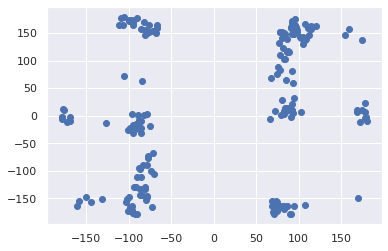

In [9]:
full_dihedrals_opt = get_gly7_dihedrals(chignolin)
plt.scatter(full_dihedrals_opt[:,0], full_dihedrals_opt[:,1])

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 10)
label = kmeans.fit_predict(full_dihedrals_opt)

(-180.0, 180.0)

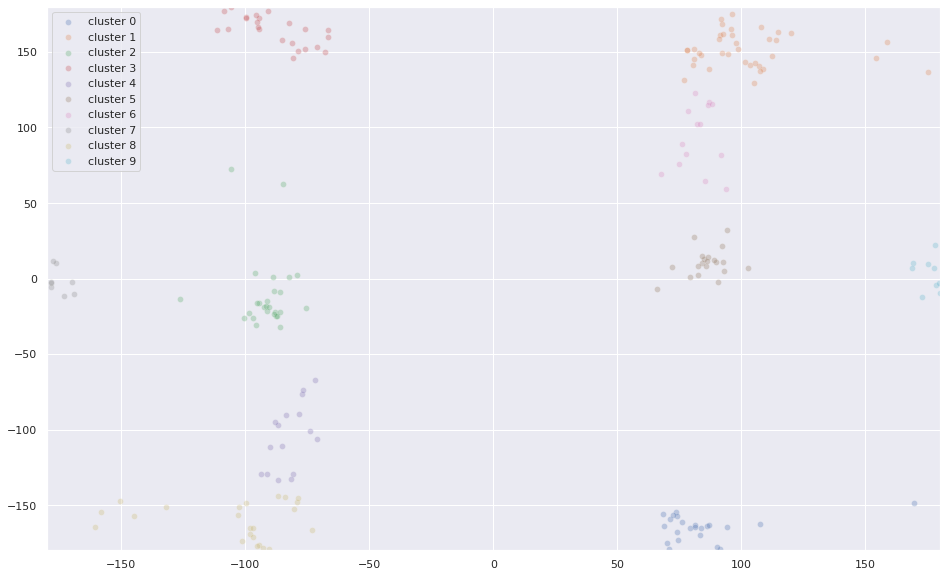

In [11]:
plt.figure(figsize=(16,10))

for label_idx in range(10):
    sns.scatterplot(
        x=full_dihedrals_opt[label == label_idx,0], 
        y=full_dihedrals_opt[label == label_idx,1],
        palette=sns.color_palette("hls", 10),
        legend="full",
        label=f"cluster {label_idx}",
        alpha=0.3
    )
plt.legend()

plt.xlim(-180, 180)
plt.ylim(-180, 180)